In [1]:
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = "2"
import torch
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib as plt
from PIL import Image
sys.path.append('../src')
from utils import *
from matplotlib.lines import Line2D
import matplotlib as mpl
import math
import matplotlib.image as mpimg
import scipy.stats as stats
from stochastic_search import StochasticSearch
import scipy as sp
from scipy.stats import pearsonr,binom,linregress
from ast import literal_eval
import json
os.chdir("..")
print(os.getcwd())


/export/raid1/home/kneel027/miniconda3/envs/SS_rel/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/export/raid1/home/kneel027/SS_release_test/Second-Sight


In [2]:
# Used in CCN
# folder   = "SCS UC 10:250:5 0.6 Exp3 AE Fixed copy"
# log_path = "/export/raid1/home/kneel027/Second-Sight/logs/" + folder + "/statistics_df_60.csv"


# Second Sight
subject = 1
experiment = "noae"
# experiment = "preprint_redux"
# experiment = "Brain Diffuser regen"
# experiment = "Cortical Convolutions"
# experiment = "Mind Diffuser"
# experiment = "Tagaki"
# experiment = "Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter"
# experiment = "iter_5"
directory_path = "output/dataframes/{}/subject{}/statistics_df_{}_104.csv".format(experiment, subject, experiment)

# subject = 1
# folder = "dataframes"
# experiment = "Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter"
directory_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight-Archive/reconstructions/subject1/dataframes/statistics_df_Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter_done_897.csv"
# directory_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight-Archive/reconstructions/subject1/dataframes/statistics_df_Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter_only_brain_correlation_897.csv"


# Tagaki
# subject = 2
# folder = "dataframes"
# experiment = "Tagaki"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

# Mind Diffuser
# subject = 2
# folder = "dataframes"
# experiment = "Mind Diffuser"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"

# Cortical Convolutions
# subject = 1
# folder = "dataframes"
# experiment = "Cortical Convolutions"
# directory_path = "/export/raid1/home/ojeda040/Second-Sight/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_brain_correlation_897.csv"
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_seq_items', None)
df = pd.read_csv(directory_path)
df.head(100)

#   0 --> Ground Truth
#   1 --> VDVAE Distribution        (Decoded Distribution)
#   2 --> Clip Distrubituon         (Decoded CLIP Only)
#   3 --> Clip Distrubituon + VDVAE (Decoded CLIP + VDVAE)
#   4 --> iter_0
#   5 --> iter_1
#   6 --> iter_2
#   7 --> iter_3
#   8 --> iter_4
#   9 --> iter_5
#  10 --> Search Reconstruction


,Unnamed: 0,ID,Sample Count,Batch Number,Search Reconstruction,Sample Indicator,Strength,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,Brain Correlation V4,Brain Correlation Early Visual,Brain Correlation Higher Visual,Brain Correlation NSD General,SSIM,Pixel Correlation,CLIP Cosine,CLIP Two-way,AlexNet 2,AlexNet 5,AlexNet 7,Inception V3,EffNet-B,SwAV
0,0,20,0.0,NaN,NaN,1,0.918611,0.149382,0.229241,0.329448,0.105418,0.239120,0.464926,0.421514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,20,1.0,NaN,NaN,1,0.908889,0.147515,0.167405,0.236061,0.246393,0.211213,0.459264,0.412338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,20,2.0,NaN,NaN,1,0.882500,0.169191,0.110722,0.078040,0.154120,0.122638,0.437503,0.372827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,20,3.0,NaN,NaN,1,0.831111,0.176302,0.178764,0.232333,0.210013,0.223731,0.407064,0.364179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,20,4.0,NaN,NaN,1,0.746389,0.189786,0.183530,0.225880,0.227360,0.216021,0.427547,0.388465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,20,5.0,NaN,NaN,1,0.620000,0.195104,0.292052,0.321617,0.195169,0.281214,0.398049,0.374531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,20,6.0,NaN,NaN,1,0.443611,0.068922,0.164309,0.215732,0.254290,0.192383,0.450095,0.389833,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,20,7.0,NaN,NaN,1,0.208889,0.187346,0.123807,0.212880,0.284252,0.218769,0.427355,0.381475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,20,8.0,NaN,NaN,1,-0.092500,0.130174,0.123109,0.206121,0.198286,0.188292,0.533184,0.455074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,20,9.0,NaN,NaN,1,-0.468889,0.226897,0.150157,0.189036,0.034487,0.176788,0.462237,0.406332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
def column_string_to_list(df):
    
    df_new = df
    
    for index, row in tqdm(df.iterrows(), "creating lists"):
        
        df_new.at[index, 'CLIP Two-way']    = json.loads(row['CLIP Two-way'])
        df_new.at[index, 'AlexNet 2']       = json.loads(row['AlexNet 2'])
        df_new.at[index, 'AlexNet 5']       = json.loads(row['AlexNet 5'])
        df_new.at[index, 'AlexNet 7']       = json.loads(row['AlexNet 7'])
        df_new.at[index, 'Inception V3']    = json.loads(row['Inception V3'])
        df_new.at[index, 'EffNet-B']        = json.loads(row['EffNet-B'])
        df_new.at[index, 'SwAV']            = json.loads(row['SwAV'])
        
    return df_new

new_df = column_string_to_list(df)

creating lists: 832it [00:26, 31.18it/s]


In [8]:
['ID', 'Sample Count', 'Batch Number', 'Search Reconstruction', 'Sample Indicator', 'Strength', 'Brain Correlation V1', 'Brain Correlation V2', 
'Brain Correlation V3', 'Brain Correlation V4', 'Brain Correlation Early Visual', 'Brain Correlation Higher Visual', 'Brain Correlation NSD General',
'SSIM', 'Pixel Correlation', 'CLIP Cosine', 'CLIP Two-way', 'AlexNet 2', 'AlexNet 5', 'AlexNet 7', 'Inception V3', 'EffNet-B', 'SwAV']

# Input: Dataframe containing the samples one type of image
def create_cnn_numpy_array(df):
    cnn_dict = {}
    df = df.reset_index()
    
    alexnet_2       = []
    alexnet_5       = []
    alexnet_7       = []
    clip_two_way    = []
    inception_v3    = []
    effnet_b        = []
    swav            = []
    
    for index, row in df.iterrows():
        
        alexnet_2.append(row['AlexNet 2'])
        alexnet_5.append(np.array(row['AlexNet 5']))
        alexnet_7.append(np.array(row['AlexNet 7']))
        clip_two_way.append(np.array(row['CLIP Two-way']))
        inception_v3.append(np.array(row['Inception V3']))
        effnet_b.append(np.array(row['EffNet-B']))
        swav.append(np.array(row['SwAV']))
    
    cnn_dict['AlexNet 2']      = np.concatenate([alexnet_2])
    cnn_dict['AlexNet 5']      = np.concatenate([alexnet_5])
    cnn_dict['AlexNet 7']      = np.concatenate([alexnet_7])
    cnn_dict['CLIP Two-way']   = np.concatenate([clip_two_way])
    cnn_dict['Inception V3']   = np.concatenate([inception_v3])
    cnn_dict['EffNet-B']       = np.concatenate([effnet_b])
    cnn_dict['SwAV']           = np.concatenate([swav])
    
    return cnn_dict

def pairwise_corr_all(ground_truth, predictions):
    r = np.corrcoef(ground_truth, predictions)#cosine_similarity(ground_truth, predictions)#
    r = r[:len(ground_truth), len(ground_truth):]  # rows: groundtruth, columns: predicitons
    #print(r.shape)
    # congruent pairs are on diagonal
    congruents = np.diag(r)
    #print(congruents)
    
    # for each column (predicition) we should count the number of rows (groundtruth) that the value is lower than the congruent (e.g. success).
    success = r < congruents
    success_cnt = np.sum(success, 0)
    
    # note: diagonal of 'success' is always zero so we can discard it. That's why we divide by len-1
    perf = np.mean(success_cnt) / (len(ground_truth)-1)
    p = 1 - binom.cdf(perf*len(ground_truth)*(len(ground_truth)-1), len(ground_truth)*(len(ground_truth)-1), 0.5)
    
    return perf, p

def compute_cnn_metrics(cnn_metrics_ground_truth, cnn_metrics_reconstructions):
    
    distance_fn = sp.spatial.distance.correlation
    pairwise_corrs = []
    cnn_metrics = {}
    
    for net_name, predictions_np in cnn_metrics_reconstructions.items():
        
        gt_feat = cnn_metrics_ground_truth[net_name]
        
        eval_feat = predictions_np
        num_test = predictions_np.shape[0]
        
        # print(net_name)
        if net_name == 'EffNet-B' or net_name == 'SwAV':
            cnn_metrics[net_name] = np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean()
            #print('distance: ',np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean())
        else:
            cnn_metrics[net_name] = pairwise_corr_all(gt_feat[:num_test],eval_feat[:num_test])[0]
            #pairwise_corrs.append(pairwise_corr_all(gt_feat[:num_test],eval_feat[:num_test])[0])
            #print('pairwise corr: ',pairwise_corrs[-1])
            
    return cnn_metrics  

In [9]:
# Statistical Analysis Tagaki/ Brain Diffuser/ Mind diffuser

single = True

['ID', 'Regen Number', 'Sample Indicator', 'SSIM', 'Pixel Correlation', 'CLIP Cosine', 
'CLIP Two-way', 'AlexNet 2', 'AlexNet 5', 'AlexNet 7', 'Inception V3', 'EffNet-B', 'SwAV']

if(single):
    df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
    df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]

    cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

    print("------------------------------------------------ SSIM -----------------------------------------------------------------")

    print("SSIM: ", df_final_samples['SSIM'].mean())

    print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

    print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

    print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

    print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

    print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Two-way ----------------------------------------------------------")

    print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

    print("------------------------------------------------ AlexNet 2 --------------------------------------------------------------")

    print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

    print("------------------------------------------------ AlexNet 5 --------------------------------------------------------------")

    print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

    print("------------------------------------------------ AlexNet 7 --------------------------------------------------------------")

    print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

    print("------------------------------------------------ Inception V3 -----------------------------------------------------------")

    print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

    print("------------------------------------------------ EffNet-B ---------------------------------------------------------------")

    print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

    print("------------------------------------------------ SwAV -------------------------------------------------------------------")

    print("SwAV: ", ((cnn_metrics_0['SwAV'])))
    
else:
    df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
    df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]
    df_final_samples_0  = df_final_samples.loc[(df_final_samples['Regen Number'] == 0)]
    df_final_samples_1  = df_final_samples.loc[(df_final_samples['Regen Number'] == 1)]
    df_final_samples_2  = df_final_samples.loc[(df_final_samples['Regen Number'] == 2)]
    df_final_samples_3  = df_final_samples.loc[(df_final_samples['Regen Number'] == 3)]
    df_final_samples_4  = df_final_samples.loc[(df_final_samples['Regen Number'] == 4)]

    cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_0))
    cnn_metrics_1 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_1))
    cnn_metrics_2 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_2))
    cnn_metrics_3 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_3))
    cnn_metrics_4 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_4))

    print("------------------------------------------------ SSIM -----------------------------------------------------------------")

    print("SSIM: ", df_final_samples['SSIM'].mean())

    print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ Pixel Correlation -----------------------------------------------------------------")

    print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

    print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Cosine -----------------------------------------------------------------")

    print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

    print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

    print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

    print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'] + cnn_metrics_1['CLIP Two-way'] + cnn_metrics_2['CLIP Two-way'] + cnn_metrics_3['CLIP Two-way'] + cnn_metrics_4['CLIP Two-way']) / 5))

    print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

    print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'] + cnn_metrics_1['AlexNet 2'] + cnn_metrics_2['AlexNet 2'] + cnn_metrics_3['AlexNet 2'] + cnn_metrics_4['AlexNet 2']) / 5))

    print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

    print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'] + cnn_metrics_1['AlexNet 5'] + cnn_metrics_2['AlexNet 5'] + cnn_metrics_3['AlexNet 5'] + cnn_metrics_4['AlexNet 5']) / 5))

    print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

    print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'] + cnn_metrics_1['AlexNet 7'] + cnn_metrics_2['AlexNet 7'] + cnn_metrics_3['AlexNet 7'] + cnn_metrics_4['AlexNet 7']) / 5))

    print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

    print("Inception V3: ", ((cnn_metrics_0['Inception V3'] + cnn_metrics_1['Inception V3'] + cnn_metrics_2['Inception V3'] + cnn_metrics_3['Inception V3'] + cnn_metrics_4['Inception V3']) / 5))

    print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

    print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'] + cnn_metrics_1['EffNet-B'] + cnn_metrics_2['EffNet-B'] + cnn_metrics_3['EffNet-B'] + cnn_metrics_4['EffNet-B']) / 5))

    print("------------------------------------------------ SwAV -----------------------------------------------------------------")

    print("SwAV: ", ((cnn_metrics_0['SwAV'] + cnn_metrics_1['SwAV'] + cnn_metrics_2['SwAV'] + cnn_metrics_3['SwAV'] + cnn_metrics_4['SwAV']) / 5))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  nan


/export/raid1/home/kneel027/miniconda3/envs/SS_rel/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/export/raid1/home/kneel027/miniconda3/envs/SS_rel/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_54495/323833074.py:71: RuntimeWarning: Mean of empty slice.
  cnn_metrics[net_name] = np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean()


ZeroDivisionError: float division by zero

In [11]:
# Statistical Analysis Second Sight

# df_final_samples    = new_df.loc[(new_df['Search Reconstruction'] == True)]
df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 10)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]
df_final_samples_0  = df_final_samples.loc[(df_final_samples['Sample Count'] == 0)]
df_final_samples_1  = df_final_samples.loc[(df_final_samples['Sample Count'] == 1)]
df_final_samples_2  = df_final_samples.loc[(df_final_samples['Sample Count'] == 2)]
df_final_samples_3  = df_final_samples.loc[(df_final_samples['Sample Count'] == 3)]
df_final_samples_4  = df_final_samples.loc[(df_final_samples['Sample Count'] == 4)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_0))
cnn_metrics_1 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_1))
cnn_metrics_2 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_2))
cnn_metrics_3 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_3))
cnn_metrics_4 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_4))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation -----------------------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine -----------------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'] + cnn_metrics_1['CLIP Two-way'] + cnn_metrics_2['CLIP Two-way'] + cnn_metrics_3['CLIP Two-way'] + cnn_metrics_4['CLIP Two-way']) / 5))

print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'] + cnn_metrics_1['AlexNet 2'] + cnn_metrics_2['AlexNet 2'] + cnn_metrics_3['AlexNet 2'] + cnn_metrics_4['AlexNet 2']) / 5))

print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'] + cnn_metrics_1['AlexNet 5'] + cnn_metrics_2['AlexNet 5'] + cnn_metrics_3['AlexNet 5'] + cnn_metrics_4['AlexNet 5']) / 5))

print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'] + cnn_metrics_1['AlexNet 7'] + cnn_metrics_2['AlexNet 7'] + cnn_metrics_3['AlexNet 7'] + cnn_metrics_4['AlexNet 7']) / 5))

print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'] + cnn_metrics_1['Inception V3'] + cnn_metrics_2['Inception V3'] + cnn_metrics_3['Inception V3'] + cnn_metrics_4['Inception V3']) / 5))

print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'] + cnn_metrics_1['EffNet-B'] + cnn_metrics_2['EffNet-B'] + cnn_metrics_3['EffNet-B'] + cnn_metrics_4['EffNet-B']) / 5))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'] + cnn_metrics_1['SwAV'] + cnn_metrics_2['SwAV'] + cnn_metrics_3['SwAV'] + cnn_metrics_4['SwAV']) / 5))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.2874614159846154
Confidence Interval SSIM:  0.013512405126712725
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.17367464201519228
Confidence Interval Pixel Correlation:  0.0163683065148657
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.6314959382794231
Confidence Interval CLIP Cosine:  0.009684728025389226
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8643577296489917
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.8791635548917103
-----------------------------------------

In [13]:
df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way ---------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

print("------------------------------------------------ AlexNet 2 ------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

print("------------------------------------------------ AlexNet 5 ------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

print("------------------------------------------------ AlexNet 7 ------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

print("------------------------------------------------ Inception V3 ---------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

print("------------------------------------------------ EffNet-B -------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'])))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.25470558335128207
Confidence Interval SSIM:  0.010396951896873938
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.1378192931123746
Confidence Interval Pixel Correlation:  0.01429154247490737
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.656962331305574
Confidence Interval CLIP Cosine:  0.00803621106896937
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8594695612358656
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.8690264671922281
------------------------------------------

In [8]:
# Used in CCN
# folder   = "SCS UC 10:250:5 0.6 Exp3 AE Fixed copy"
# log_path = "/export/raid1/home/kneel027/Second-Sight/logs/" + folder + "/statistics_df_60.csv"

# Paper Only
# df_final_samples    = df.loc[(df['Sample Indicator'] == 10)]
df_final_samples_bc = df.loc[(df['Search Reconstruction'] == True)]# & (df['ID'] < 140) & (df['ID'] > 20)]
# df_final_samples = df_final_samples.loc[]
print(len(df_final_samples_bc), len(df_final_samples_bc)/5)


print("------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------")

print("Brain Correlation V1: ", df_final_samples_bc['Brain Correlation V1'].mean())

print("------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------")

print("Brain Correlation V2: ", df_final_samples_bc['Brain Correlation V2'].mean())

print("------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------")

print("Brain Correlation V3: ", df_final_samples_bc['Brain Correlation V3'].mean())

print("------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------")

print("Brain Correlation V4: ", df_final_samples_bc['Brain Correlation V4'].mean())

print("------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------")

print("Brain Correlation Early Visual: ", df_final_samples_bc['Brain Correlation Early Visual'].mean())

print("------------------------------------------------ Brain Correlation Higher Visual -------------------------------------------------------")

print("Brain Correlation Higher Visual: ", df_final_samples_bc['Brain Correlation Higher Visual'].mean())

print("------------------------------------------------ Brain Correlation NSD General ---------------------------------------------------------")

print("Brain Correlation NSD General: ", df_final_samples_bc['Brain Correlation NSD General'].mean())
df_final_samples.tail(20)


4485 897.0
------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------
Brain Correlation V1:  0.35259658105774805
------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------
Brain Correlation V2:  0.3511824997274471
------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------
Brain Correlation V3:  0.3549990631700557
------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------
Brain Correlation V4:  0.32671812455953175
------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------
Brain Correlation Early Visual:  0.35690538658434784
------------------------------------------------ Brain Correlation Higher Visual -----

,Unnamed: 0,ID,Sample Count,Batch Number,Search Reconstruction,Sample Indicator,Strength,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,Brain Correlation V4,Brain Correlation Early Visual,Brain Correlation Higher Visual,Brain Correlation NSD General,SSIM,Pixel Correlation,CLIP Cosine,CLIP Two-way,AlexNet 2,AlexNet 5,AlexNet 7,Inception V3,EffNet-B,SwAV
61658,61658,978,0.0,1.0,True,5,0.918611,0.521916,0.426580,0.434039,0.619299,0.483826,0.467327,0.464468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61659,61659,978,1.0,1.0,True,5,0.908889,0.669992,0.597563,0.539457,0.655940,0.617391,0.502921,0.538868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61660,61660,978,2.0,1.0,True,5,0.882500,0.706908,0.610740,0.563771,0.654898,0.640441,0.498749,0.546401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61661,61661,978,3.0,1.0,True,5,0.831111,0.667163,0.600201,0.522474,0.625583,0.609348,0.491443,0.529717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61662,61662,978,4.0,1.0,True,5,0.746389,0.627156,0.549904,0.532656,0.637468,0.584557,0.501264,0.528155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61747,61747,979,0.0,2.0,True,9,0.918611,0.577785,0.517681,0.475852,0.471118,0.523583,0.343360,0.423162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61748,61748,979,1.0,2.0,True,9,0.908889,0.618370,0.549678,0.494465,0.514521,0.554744,0.392753,0.459378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61749,61749,979,2.0,2.0,True,9,0.882500,0.598184,0.477340,0.364546,0.451893,0.495390,0.301747,0.397170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61750,61750,979,3.0,2.0,True,9,0.831111,0.605673,0.556721,0.483014,0.526366,0.554807,0.356904,0.444567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61751,61751,979,4.0,2.0,True,9,0.746389,0.569645,0.505352,0.470557,0.442619,0.509052,0.293619,0.391165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

# print("CLIP Two-way: ", (cnn_metrics_0['CLIP Two-way']))

# print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

# print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

# print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

# print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

# print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

# print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

# print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

# print("Inception V3: ", ((cnn_metrics_0['Inception V3'] )))

# print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

# print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

# print("------------------------------------------------ SwAV -----------------------------------------------------------------")

# print("SwAV: ", ((cnn_metrics_0['SwAV'])))


# print("------------------------------------------------ Library Reconstruction -----------------------------------------------------------------\n")

# df_library_samples = df.loc[(df['Sample Indicator'] == 3.0)]

# print("Final Sample Mean SSIM Library Reconstruction: ", df_library_samples['SSIM'].mean())

# print("Final Sample Confidence Interval SSIM Search Reconstruction: ", ((df_library_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("Final Sample Mean Pixel Correlation Library Reconstruction: ", df_library_samples['Pixel Correlation'].mean())

# print("Final Sample Confidence Interval Pixel Correlation Library Reconstruction: ", ((df_library_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("Final Sample Mean CLIP Pearson Library Reconstruction: ", df_library_samples['CLIP Pearson'].mean())

# print("Final Sample Mean CLIP Two-way Library Reconstruction: ", df_library_samples['CLIP Two-way'].mean())

# print("Final Sample Confidence Interval CLIP Two-way Library Reconstruction : ", ((df_library_samples['CLIP Two-way'].std() * 1.96) / math.sqrt(len(df_library_samples.index))))

# print("------------------------------------------------ Decoded CLIP Only -----------------------------------------------------------------\n")

# df_decoded_samples = df.loc[(df['Sample Indicator'] == 2.0)]

# print("Final Sample Mean SSIM Decoded CLIP Only: ", df_decoded_samples['SSIM'].mean())

# print("Final Sample Confidence Interval SSIM Decoded CLIP Only: ", ((df_decoded_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_decoded_samples.index))))

# print("Final Sample Mean Pixel Correlation Decoded CLIP Only: ", df_decoded_samples['Pixel Correlation'].mean())

# print("Final Sample Confidence Interval Pixel Correlation Decoded CLIP Only: ", ((df_decoded_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_decoded_samples.index))))

# Second Sight
subject = 1
folder = "dataframes"
# experiment = "Brain Diffuser regen"
# experiment = "Cortical Convolutions"
# experiment = "Mind Diffuser"
# experiment = "Tagaki"
experiment = "Final Run: SCS UC LD 6:100:4 Dual Guided clip_iter"
# experiment = "iter_5"
directory_path = "/export/raid1/home/ojeda040/Second-Sight-Archive/reconstructions/subject" + str(subject) + "/" + folder + "/statistics_df_" + experiment + "_897.csv"

# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)
# pd.set_option('display.max_seq_items', None)
df = pd.read_csv(directory_path)
df.head(100)

#   0 --> Ground Truth
#   1 --> VDVAE Distribution        (Decoded Distribution)
#   2 --> Clip Distrubituon         (Decoded CLIP Only)
#   3 --> Clip Distrubituon + VDVAE (Decoded CLIP + VDVAE)
#   4 --> iter_0
#   5 --> iter_1
#   6 --> iter_2
#   7 --> iter_3
#   8 --> iter_4
#   9 --> iter_5
#  10 --> Search Reconstruction


In [4]:
# Create CNN metric columns into lists (Only run if computing CNN Metrics)

def column_string_to_list(df):
    
    df_new = df
    
    for index, row in tqdm(df.iterrows(), "creating lists"):
        
        df_new.at[index, 'CLIP Two-way']    = json.loads(row['CLIP Two-way'])
        df_new.at[index, 'AlexNet 2']       = json.loads(row['AlexNet 2'])
        df_new.at[index, 'AlexNet 5']       = json.loads(row['AlexNet 5'])
        df_new.at[index, 'AlexNet 7']       = json.loads(row['AlexNet 7'])
        df_new.at[index, 'Inception V3']    = json.loads(row['Inception V3'])
        df_new.at[index, 'EffNet-B']        = json.loads(row['EffNet-B'])
        df_new.at[index, 'SwAV']            = json.loads(row['SwAV'])
        
    return df_new

new_df = column_string_to_list(df)

creating lists: 42159it [24:10, 29.06it/s]


In [21]:
# Statistical Analysis Second Sight

# Input: Dataframe containing the samples one type of image
def create_cnn_numpy_array(df):
    cnn_dict = {}
    df = df.reset_index()
    
    alexnet_2       = []
    alexnet_5       = []
    alexnet_7       = []
    clip_two_way    = []
    inception_v3    = []
    effnet_b        = []
    swav            = []
    
    for index, row in df.iterrows():
        
        alexnet_2.append(row['AlexNet 2'])
        alexnet_5.append(np.array(row['AlexNet 5']))
        alexnet_7.append(np.array(row['AlexNet 7']))
        clip_two_way.append(np.array(row['CLIP Two-way']))
        inception_v3.append(np.array(row['Inception V3']))
        effnet_b.append(np.array(row['EffNet-B']))
        swav.append(np.array(row['SwAV']))
    
    cnn_dict['AlexNet 2']      = np.concatenate([alexnet_2])
    cnn_dict['AlexNet 5']      = np.concatenate([alexnet_5])
    cnn_dict['AlexNet 7']      = np.concatenate([alexnet_7])
    cnn_dict['CLIP Two-way']   = np.concatenate([clip_two_way])
    cnn_dict['Inception V3']   = np.concatenate([inception_v3])
    cnn_dict['EffNet-B']       = np.concatenate([effnet_b])
    cnn_dict['SwAV']           = np.concatenate([swav])
    
    return cnn_dict

def pairwise_corr_all(ground_truth, predictions):
    r = np.corrcoef(ground_truth, predictions)      #cosine_similarity(ground_truth, predictions)#
    r = r[:len(ground_truth), len(ground_truth):]   # rows: groundtruth, columns: predicitons
    
    # congruent pairs are on diagonal
    congruents = np.diag(r)
    
    # for each column (predicition) we should count the number of rows (groundtruth) 
    # that the value is lower than the congruent (e.g. success).
    success = r < congruents
    success_cnt = np.sum(success, 0)
    
    # note: diagonal of 'success' is always zero so we can discard it. That's why we divide by len-1
    perf = np.mean(success_cnt) / (len(ground_truth)-1)
    p = 1 - binom.cdf(perf*len(ground_truth)*(len(ground_truth)-1), len(ground_truth)*(len(ground_truth)-1), 0.5)
    
    return perf, p

def compute_cnn_metrics(cnn_metrics_ground_truth, cnn_metrics_reconstructions):
    
    distance_fn = sp.spatial.distance.correlation
    pairwise_corrs = []
    cnn_metrics = {}
    
    for net_name, predictions_np in cnn_metrics_reconstructions.items():
        
        gt_feat = cnn_metrics_ground_truth[net_name]
        
        eval_feat = predictions_np
        num_test = predictions_np.shape[0]
        
        if net_name == 'EffNet-B' or net_name == 'SwAV':
            cnn_metrics[net_name] = np.array([distance_fn(gt_feat[i],eval_feat[i]) for i in range(num_test)]).mean()
            
        else:
            cnn_metrics[net_name] = pairwise_corr_all(gt_feat[:num_test],eval_feat[:num_test])[0]
            
    return cnn_metrics 

df_final_samples    = new_df.loc[(new_df['Search Reconstruction'] == True)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]
df_final_samples_0  = df_final_samples.loc[(df_final_samples['Sample Count'] == 0)]
df_final_samples_1  = df_final_samples.loc[(df_final_samples['Sample Count'] == 1)]
df_final_samples_2  = df_final_samples.loc[(df_final_samples['Sample Count'] == 2)]
df_final_samples_3  = df_final_samples.loc[(df_final_samples['Sample Count'] == 3)]
df_final_samples_4  = df_final_samples.loc[(df_final_samples['Sample Count'] == 4)]


cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_0))
cnn_metrics_1 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_1))
cnn_metrics_2 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_2))
cnn_metrics_3 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_3))
cnn_metrics_4 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples_4))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation -----------------------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine -----------------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way -----------------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'] + cnn_metrics_1['CLIP Two-way'] + cnn_metrics_2['CLIP Two-way'] + cnn_metrics_3['CLIP Two-way'] + cnn_metrics_4['CLIP Two-way']) / 5))

print("------------------------------------------------ AlexNet 2 -----------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'] + cnn_metrics_1['AlexNet 2'] + cnn_metrics_2['AlexNet 2'] + cnn_metrics_3['AlexNet 2'] + cnn_metrics_4['AlexNet 2']) / 5))

print("------------------------------------------------ AlexNet 5 -----------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'] + cnn_metrics_1['AlexNet 5'] + cnn_metrics_2['AlexNet 5'] + cnn_metrics_3['AlexNet 5'] + cnn_metrics_4['AlexNet 5']) / 5))

print("------------------------------------------------ AlexNet 7 -----------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'] + cnn_metrics_1['AlexNet 7'] + cnn_metrics_2['AlexNet 7'] + cnn_metrics_3['AlexNet 7'] + cnn_metrics_4['AlexNet 7']) / 5))

print("------------------------------------------------ Inception V3 -----------------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'] + cnn_metrics_1['Inception V3'] + cnn_metrics_2['Inception V3'] + cnn_metrics_3['Inception V3'] + cnn_metrics_4['Inception V3']) / 5))

print("------------------------------------------------ EffNet-B -----------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'] + cnn_metrics_1['EffNet-B'] + cnn_metrics_2['EffNet-B'] + cnn_metrics_3['EffNet-B'] + cnn_metrics_4['EffNet-B']) / 5))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'] + cnn_metrics_1['SwAV'] + cnn_metrics_2['SwAV'] + cnn_metrics_3['SwAV'] + cnn_metrics_4['SwAV']) / 5))

print(cnn_metrics_0['Inception V3'])

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.28805564771959863
Confidence Interval SSIM:  0.00453115871984924
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.18516724942251953
Confidence Interval Pixel Correlation:  0.005675563279077434
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.6642020871800892
Confidence Interval CLIP Cosine:  0.003460082949051444
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8827530259595477
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.9166385471412646
---------------------------------------

In [13]:
cnn = create_cnn_numpy_array(df_final_samples_2)
gt = create_cnn_numpy_array(df_ground_truth)


In [70]:
cnn = create_cnn_numpy_array(df_final_samples_4)
gt = create_cnn_numpy_array(df_ground_truth)

def pairwise_corr_all(ground_truth, predictions):
    r = np.corrcoef(ground_truth, predictions)      # cosine_similarity(ground_truth, predictions)
    r = r[:len(ground_truth), len(ground_truth):]   # rows: groundtruth, columns: predicitons
    
    # congruent pairs are on diagonal
    congruents = np.diag(r)
    
    # for each column (predicition) we should count the number of rows (groundtruth) 
    # that the value is lower than the congruent (e.g. success).
    success = r < congruents
    success_cnt = np.sum(success, 0)
    
    # note: diagonal of 'success' is always zero so we can discard it. That's why we divide by len-1
    perf = np.mean(success_cnt) / (len(ground_truth)-1)
    p = 1 - binom.cdf(perf*len(ground_truth)*(len(ground_truth)-1), len(ground_truth)*(len(ground_truth)-1), 0.5)
    
    return perf, p, success



_, _, inception_v3 = pairwise_corr_all(gt['AlexNet 7'], cnn['AlexNet 7'])
inception_v3 = np.mean(inception_v3, 0)
np.save("/home/naxos2-raid25/ojeda040/local/ojeda040/Second-Sight-Archive/reconstructions/subject1/dataframes/alexnet_7_sample_4.npy", inception_v3)

In [13]:
df_final_samples    = new_df.loc[(new_df['Sample Indicator'] == 1)]
df_ground_truth     = new_df.loc[(new_df['Sample Indicator'] == 0)]

cnn_metrics_0 = compute_cnn_metrics(create_cnn_numpy_array(df_ground_truth), create_cnn_numpy_array(df_final_samples))

print("------------------------------------------------ SSIM -----------------------------------------------------------------")

print("SSIM: ", df_final_samples['SSIM'].mean())

print("Confidence Interval SSIM: ", ((df_final_samples['SSIM'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ Pixel Correlation ----------------------------------------------------")

print("Pixel Correlation: ", df_final_samples['Pixel Correlation'].mean())

print("Confidence Interval Pixel Correlation: ", ((df_final_samples['Pixel Correlation'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Cosine ----------------------------------------------------------")

print("CLIP Cosine: ", df_final_samples['CLIP Cosine'].mean())

print("Confidence Interval CLIP Cosine: ", ((df_final_samples['CLIP Cosine'].std() * 1.96) / math.sqrt(len(df_final_samples.index))))

print("------------------------------------------------ CLIP Two-way ---------------------------------------------------------")

print("CLIP Two-way: ", ((cnn_metrics_0['CLIP Two-way'])))

print("------------------------------------------------ AlexNet 2 ------------------------------------------------------------")

print("AlexNet 2: ", ((cnn_metrics_0['AlexNet 2'])))

print("------------------------------------------------ AlexNet 5 ------------------------------------------------------------")

print("AlexNet 5: ", ((cnn_metrics_0['AlexNet 5'])))

print("------------------------------------------------ AlexNet 7 ------------------------------------------------------------")

print("AlexNet 7: ", ((cnn_metrics_0['AlexNet 7'])))

print("------------------------------------------------ Inception V3 ---------------------------------------------------------")

print("Inception V3: ", ((cnn_metrics_0['Inception V3'])))

print("------------------------------------------------ EffNet-B -------------------------------------------------------------")

print("EffNet-B: ", ((cnn_metrics_0['EffNet-B'])))

print("------------------------------------------------ SwAV -----------------------------------------------------------------")

print("SwAV: ", ((cnn_metrics_0['SwAV'])))

------------------------------------------------ SSIM -----------------------------------------------------------------
SSIM:  0.25470558335128207
Confidence Interval SSIM:  0.010396951896873938
------------------------------------------------ Pixel Correlation -----------------------------------------------------------------
Pixel Correlation:  0.1378192931123746
Confidence Interval Pixel Correlation:  0.01429154247490737
------------------------------------------------ CLIP Cosine -----------------------------------------------------------------
CLIP Cosine:  0.656962331305574
Confidence Interval CLIP Cosine:  0.00803621106896937
------------------------------------------------ CLIP Two-way -----------------------------------------------------------------
CLIP Two-way:  0.8594695612358656
------------------------------------------------ AlexNet 2 -----------------------------------------------------------------
AlexNet 2:  0.8690264671922281
------------------------------------------

In [5]:

# Paper Only
# df_final_samples    = df.loc[(df['Sample Indicator'] == 11)]
df_final_samples    = df.loc[(df['Search Reconstruction'] == True) & (df['ID'] <= 140)]
print(len(df_final_samples), len(df_final_samples)/5)


print("------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------")

print("Brain Correlation V1: ", df_final_samples['Brain Correlation V1'].mean())

print("------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------")

print("Brain Correlation V2: ", df_final_samples['Brain Correlation V2'].mean())

print("------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------")

print("Brain Correlation V3: ", df_final_samples['Brain Correlation V3'].mean())

print("------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------")

print("Brain Correlation V4: ", df_final_samples['Brain Correlation V4'].mean())

print("------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------")

print("Brain Correlation Early Visual: ", df_final_samples['Brain Correlation Early Visual'].mean())

print("------------------------------------------------ Brain Correlation Higher Visual -------------------------------------------------------")

print("Brain Correlation Higher Visual: ", df_final_samples['Brain Correlation Higher Visual'].mean())

print("------------------------------------------------ Brain Correlation NSD General ---------------------------------------------------------")

print("Brain Correlation NSD General: ", df_final_samples['Brain Correlation NSD General'].mean())
df_final_samples.tail(20)


570 114.0
------------------------------------------------ Brain Correlation V1 -----------------------------------------------------------------
Brain Correlation V1:  0.3787636121089473
------------------------------------------------ Brain Correlation V2 -----------------------------------------------------------------
Brain Correlation V2:  0.3703963569891228
------------------------------------------------ Brain Correlation V3 -----------------------------------------------------------------
Brain Correlation V3:  0.37755626787298247
------------------------------------------------ Brain Correlation V4 -----------------------------------------------------------------
Brain Correlation V4:  0.339844863695614
------------------------------------------------ Brain Correlation Early Visual -------------------------------------------------------
Brain Correlation Early Visual:  0.37914650615649126
------------------------------------------------ Brain Correlation Higher Visual --------

,Unnamed: 0,ID,Sample Count,Batch Number,Search Reconstruction,Sample Indicator,Strength,Brain Correlation V1,Brain Correlation V2,Brain Correlation V3,Brain Correlation V4,Brain Correlation Early Visual,Brain Correlation Higher Visual,Brain Correlation NSD General,SSIM,Pixel Correlation,CLIP Cosine,CLIP Two-way,AlexNet 2,AlexNet 5,AlexNet 7,Inception V3,EffNet-B,SwAV
7651,7651,137,0.0,1.0,True,9,0.918611,0.525098,0.454055,0.328335,0.233557,0.428302,0.296967,0.326734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7652,7652,137,1.0,1.0,True,9,0.908889,0.534146,0.463798,0.269168,0.274850,0.431337,0.314805,0.339013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7653,7653,137,2.0,1.0,True,9,0.882500,0.529897,0.472937,0.197460,0.218495,0.415000,0.319758,0.341843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7654,7654,137,3.0,1.0,True,9,0.831111,0.489330,0.432178,0.213552,0.202145,0.387584,0.321064,0.338860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7655,7655,137,4.0,1.0,True,9,0.746389,0.540751,0.474328,0.274964,0.271738,0.439445,0.331858,0.359862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7720,7720,138,0.0,2.0,True,9,0.918611,0.315432,0.340220,0.278129,0.175153,0.273208,0.306856,0.289340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7721,7721,138,1.0,2.0,True,9,0.908889,0.348724,0.392736,0.345248,0.198905,0.308275,0.320795,0.304571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7722,7722,138,2.0,2.0,True,9,0.882500,0.334725,0.316232,0.257869,0.146379,0.255713,0.313821,0.284819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7723,7723,138,3.0,2.0,True,9,0.831111,0.330116,0.377220,0.320593,0.195726,0.301514,0.345884,0.321522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7724,7724,138,4.0,2.0,True,9,0.746389,0.330850,0.357966,0.277096,0.156594,0.276345,0.328116,0.291991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


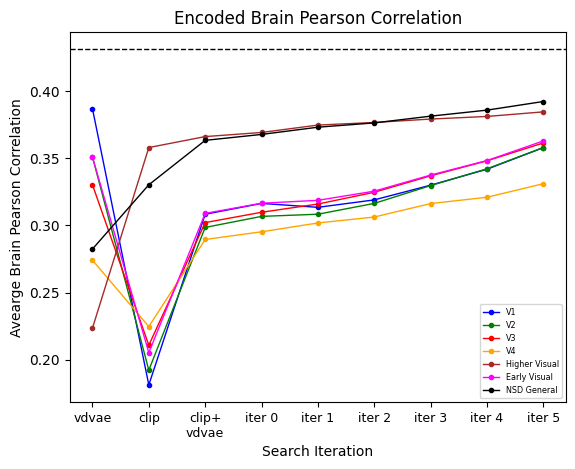

In [3]:
# Average Iteration Brain Region Plot

import matplotlib.pyplot as plt

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]

for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    

# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), color = 'blue', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), color = 'green', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), color = 'red',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), color = 'orange',linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), color = 'brown', linestyle = 'dashed', linewidth=1)
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(),  color = 'magenta',linestyle = 'dashed', linewidth=1)
plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean(), color = 'black', linestyle = 'dashed', linewidth=1)

plt.plot(brain_correlation_V1, marker='.', color = 'blue', label = 'V1', linewidth=1)
plt.plot(brain_correlation_V2, marker='.', color = 'green',label = 'V2', linewidth=1)
plt.plot(brain_correlation_V3, marker='.', color = 'red',  label = 'V3', linewidth=1)
plt.plot(brain_correlation_V4, marker='.', color = 'orange', label = 'V4', linewidth=1)
plt.plot(brain_correlation_higher_visual, marker='.', color = 'brown', label = 'Higher Visual', linewidth=1)
plt.plot(brain_correlation_early_visual, marker='.',  color = 'magenta', label = 'Early Visual', linewidth=1)
plt.plot(brain_correlation_unmasked, marker='.',  color = 'black', label = 'NSD General', linewidth=1)
plt.xticks(range(len(x)), x,fontsize=9)

plt.legend(fontsize = "xx-small")
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 300


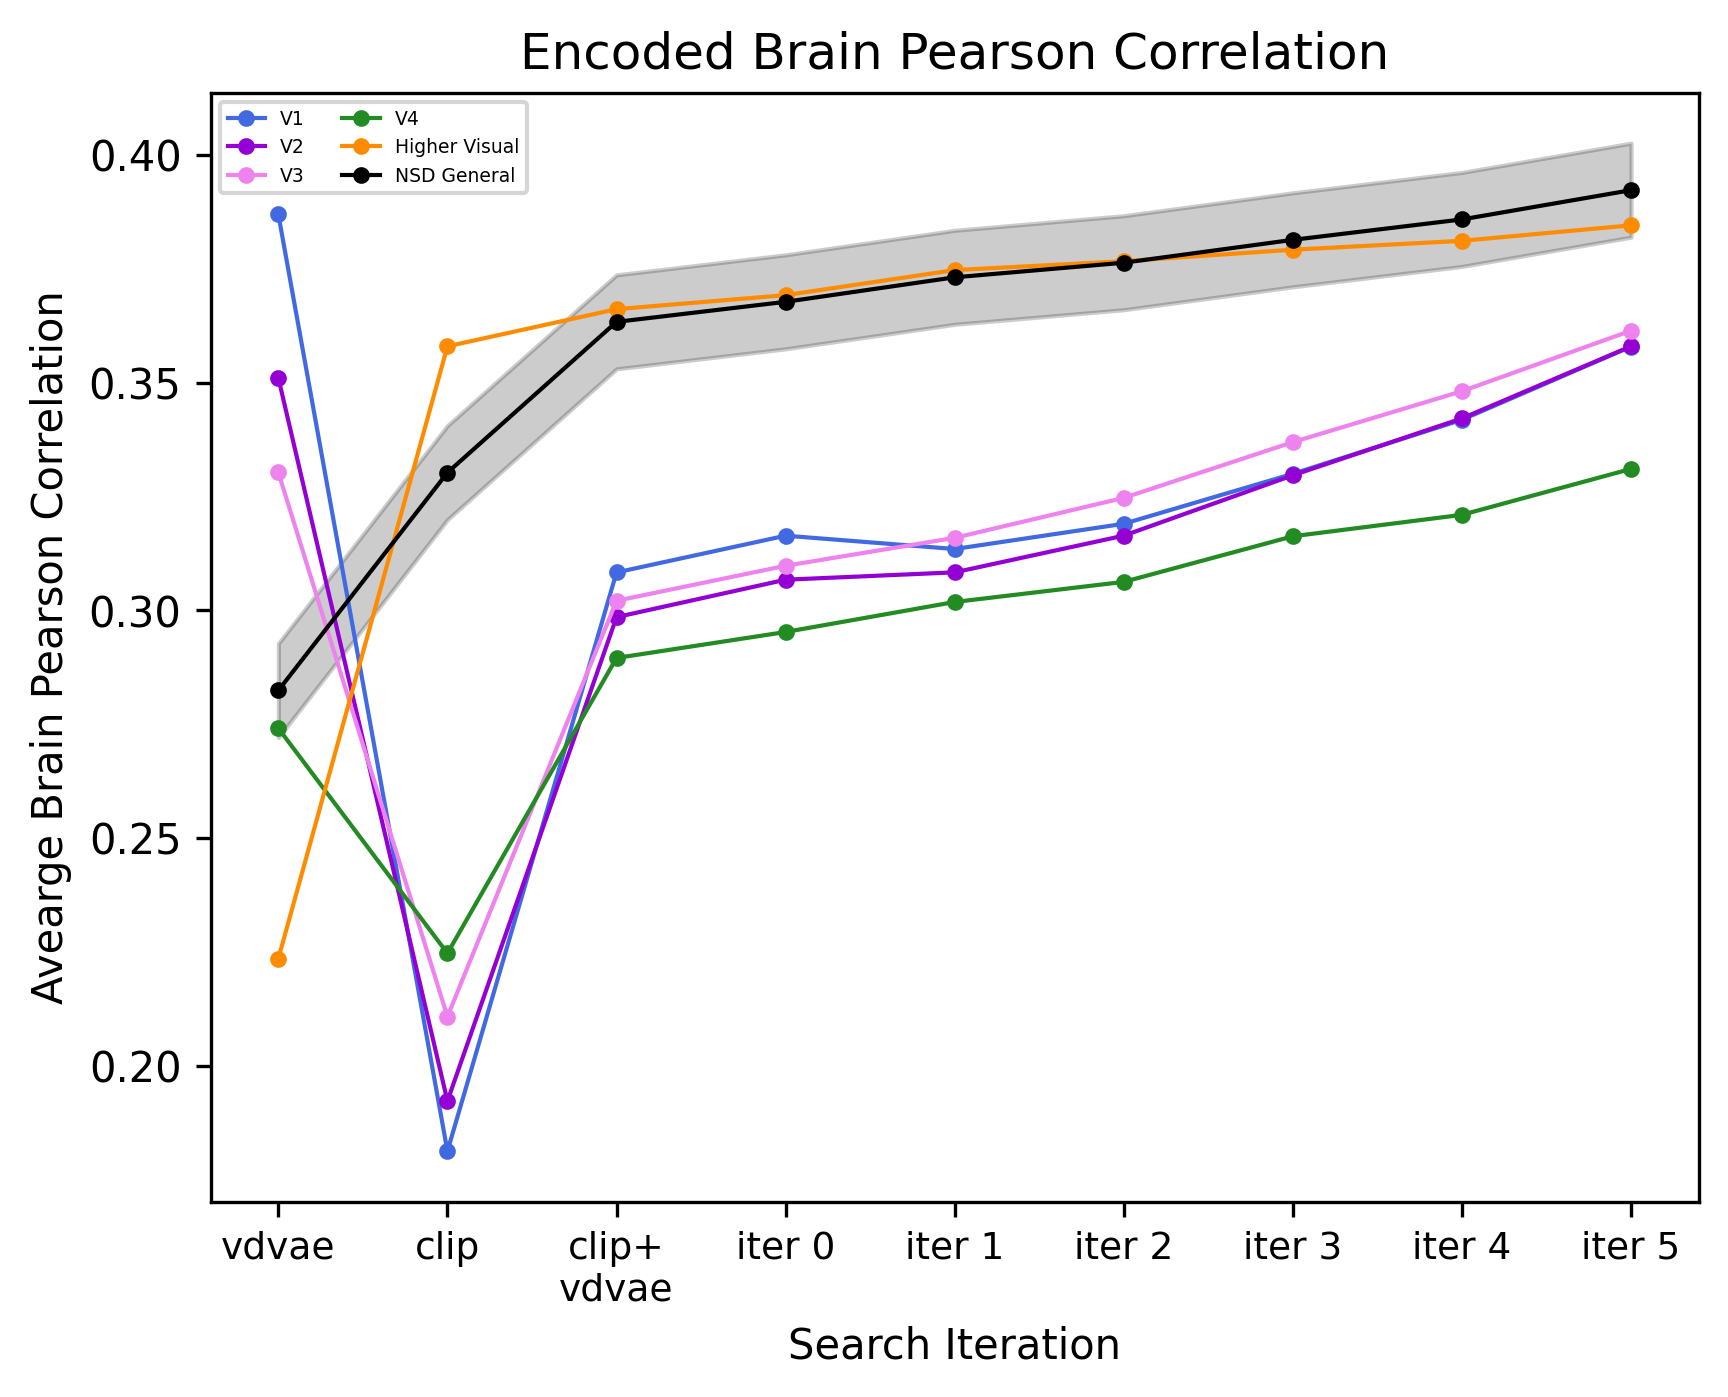

In [21]:
# Average Iteration Brain Region Plot

brain_correlation_V1 = []
brain_correlation_V2 = []
brain_correlation_V3 = []
brain_correlation_V4 = []
brain_correlation_early_visual = []
brain_correlation_higher_visual = []
brain_correlation_unmasked = []
brain_correlation_ground_truth = []

y_v1 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean()
y_v2 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean()
y_v3 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean()
y_v4 = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean()
y_ev = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean()
y_hv = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean()
y_unmasked = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation NSD General'].mean()

v1_set = True
v2_set = True
v3_set = True
v4_set = True
ev_set = True
hv_set = True
unmasked_set = True

x_v1 = 0 
x_v2 = 0 
x_v3 = 0 
x_v4 = 0 
x_ev = 0 
x_hv = 0 
x_umasked = 0 

folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
iteration = 0


for folder, sample_indicator in folders.items():
    
    iteration_val_v1 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V1'].mean()
    iteration_val_v2 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V2'].mean()
    iteration_val_v3 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V3'].mean()
    iteration_val_v4 = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation V4'].mean()
    iteration_val_ev = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Early Visual'].mean()
    iteration_val_hv = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation Higher Visual'].mean()
    iteration_val_unmasked = df.loc[(df['Sample Indicator'] == sample_indicator)]['Brain Correlation NSD General'].mean()
    
    brain_correlation_V1.append(iteration_val_v1)
    brain_correlation_V2.append(iteration_val_v2)
    brain_correlation_V3.append(iteration_val_v3)
    brain_correlation_V4.append(iteration_val_v4)
    brain_correlation_early_visual.append(iteration_val_ev)
    brain_correlation_higher_visual.append(iteration_val_hv)
    brain_correlation_unmasked.append(iteration_val_unmasked)
    
    if(iteration_val_v1 > y_v1 and v1_set):
        x_v1 = iteration - 1
        v1_set = False
        
    if(iteration_val_v2 > y_v2 and v2_set):
        x_v2 = iteration - 1
        v2_set = False
        
    if(iteration_val_v3 > y_v3 and v3_set):
        x_v3 = iteration - 1
        v3_set = False
        
    if(iteration_val_v4 > y_v4 and v4_set):
        x_v4 = iteration - 1
        v4_set = False
        
    if(iteration_val_ev > y_ev and ev_set):
        x_ev = iteration - 1
        ev_set = False
        
    if(iteration_val_hv > y_hv and hv_set):
        x_hv = iteration - 1
        hv_set = False
        
    if(iteration_val_unmasked > y_unmasked and unmasked_set):
        x_unmasked = iteration - 1
        unmasked_set = False
        
    iteration += 1
    
# print(df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean())
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')


N = 9
#x = np.array([0,1,2,3,4,5,6,7,8,9])
# y = np.array(brain_correlation_unmasked)
# a, b = np.polyfit(x, brain_correlation_unmasked, deg=1)
# y_est = a * x + b
# y_err = st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y), scale=st.sem(y))
# print(y_err[0])
# print(y_err[1])

y_un = np.array(brain_correlation_unmasked)
ci_un = 0.95 * np.std(y_un) / math.sqrt(N)


# def mean_confidence_interval(data, confidence=0.95):
#     a = 1.0 * np.array(data)
#     n = len(a)
#     m, se = np.mean(a), scipy.stats.sem(a)
#     h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
#     return m, m-h, m+h

# mean, lower, upper = [],[],[]
# ci = 0.95

# m, ml, mu = mean_confidence_interval(y, ci)
# mean.append(m)
# lower.append(ml)
# upper.append(mu)


plt.plot(brain_correlation_V1, marker='.', label = 'V1', linewidth=1, color = "royalblue")
plt.plot(brain_correlation_V2, marker='.', label = 'V2', linewidth=1, color = "darkviolet")
plt.plot(brain_correlation_V3, marker='.', label = 'V3', linewidth=1, color = "red")
plt.plot(brain_correlation_V4, marker='.', label = 'V4', linewidth=1, color = "forestgreen")
#plt.plot(brain_correlation_early_visual, marker='.', label = 'Early Visual', linewidth=1, color = "red")
plt.plot(brain_correlation_higher_visual, marker='.', label = 'Higher Visual', linewidth=1, color = "darkorange")
plt.plot(brain_correlation_unmasked, marker='.', label = 'NSD General', linewidth=1, color = "black")
plt.xticks(range(len(x)), x,fontsize=9)
# plt.fill_between(x, y_err[0], y_err[0], color='dimgray', alpha=0.2)
# plt.fill_between(x, upper, lower, color='dimgray', alpha=0.2)
plt.fill_between(x, (y_un-ci_un), (y_un+ci_un), color='black', alpha=.2)
# plt.fill_between(x, (y_hi-ci_hi), (y_hi+ci_hi), color='darkorange', alpha=.2)
# plt.fill_between(x, (y_er-ci_er), (y_er+ci_er), color='red', alpha=.2)
# plt.fill_between(x, (y_vo-ci_vo), (y_vo+ci_vo), color='royalblue', alpha=.2)
# plt.fill_between(x, (y_vt-ci_vt), (y_vt+ci_vt), color='darkviolet', alpha=.2)
# plt.fill_between(x, (y_vth-ci_vth), (y_vth+ci_vth), color='violet', alpha=.2)
# plt.fill_between(x, (y_vf-ci_vf), (y_vf+ci_vf), color='forestgreen', alpha=.2)

# plt.plot([7.25, 7 + 1], [y_v1, y_v1] , color = "royalblue", linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_v2, y_v2] , color = "darkviolet", linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_v3, y_v3] , color = "violet", linestyle="dashed", linewidth=2)
# plt.plot([x_v4 + 0.25, x_v4 + 1], [y_v4, y_v4] , color = 'forestgreen', linestyle="dashed", linewidth=2)
# plt.plot([7.25, 7 + 1], [y_ev - 0.002, y_ev - 0.002] , color = 'red', linestyle="dashed", linewidth=2)
# plt.plot([x_hv - 0.25, x_hv + 0.50], [y_hv, y_hv] , color = "darkorange", linestyle="dashed", linewidth=2)
# plt.plot([x_unmasked + 0.5, x_unmasked + 1.25], [y_unmasked, y_unmasked] , color = 'black', linestyle="dashed", linewidth=2, label="Ground Truth Image")
#plt.axhline(x = [1,3], y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Unmasked'].mean(), linestyle = 'dashed', label = 'Brain Correlation Unmasked')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V1'].mean(), linestyle = '-', label = 'Brain Correlation V1')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V2'].mean(), linestyle = '-', label = 'Brain Correlation V2')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V3'].mean(), linestyle = '-', label = 'Brain Correlation V3')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation V4'].mean(), linestyle = '-', label = 'Brain Correlation V4')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Higher Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
# plt.axhline(y = df.loc[(df['Sample Indicator'] == 0.0)]['Brain Correlation Early Visual'].mean(), linestyle = '-', label = 'Brain Correlation Higher Visual')
leg = plt.legend(loc="upper left", ncol = 2, fontsize = "4.5")
# leg.legendHandles[7].set_color('silver')
plt.xlabel("Search Iteration")
plt.ylabel("Avearge Brain Pearson Correlation")
plt.title("Encoded Brain Pearson Correlation")
mpl.rcParams['figure.dpi'] = 2500


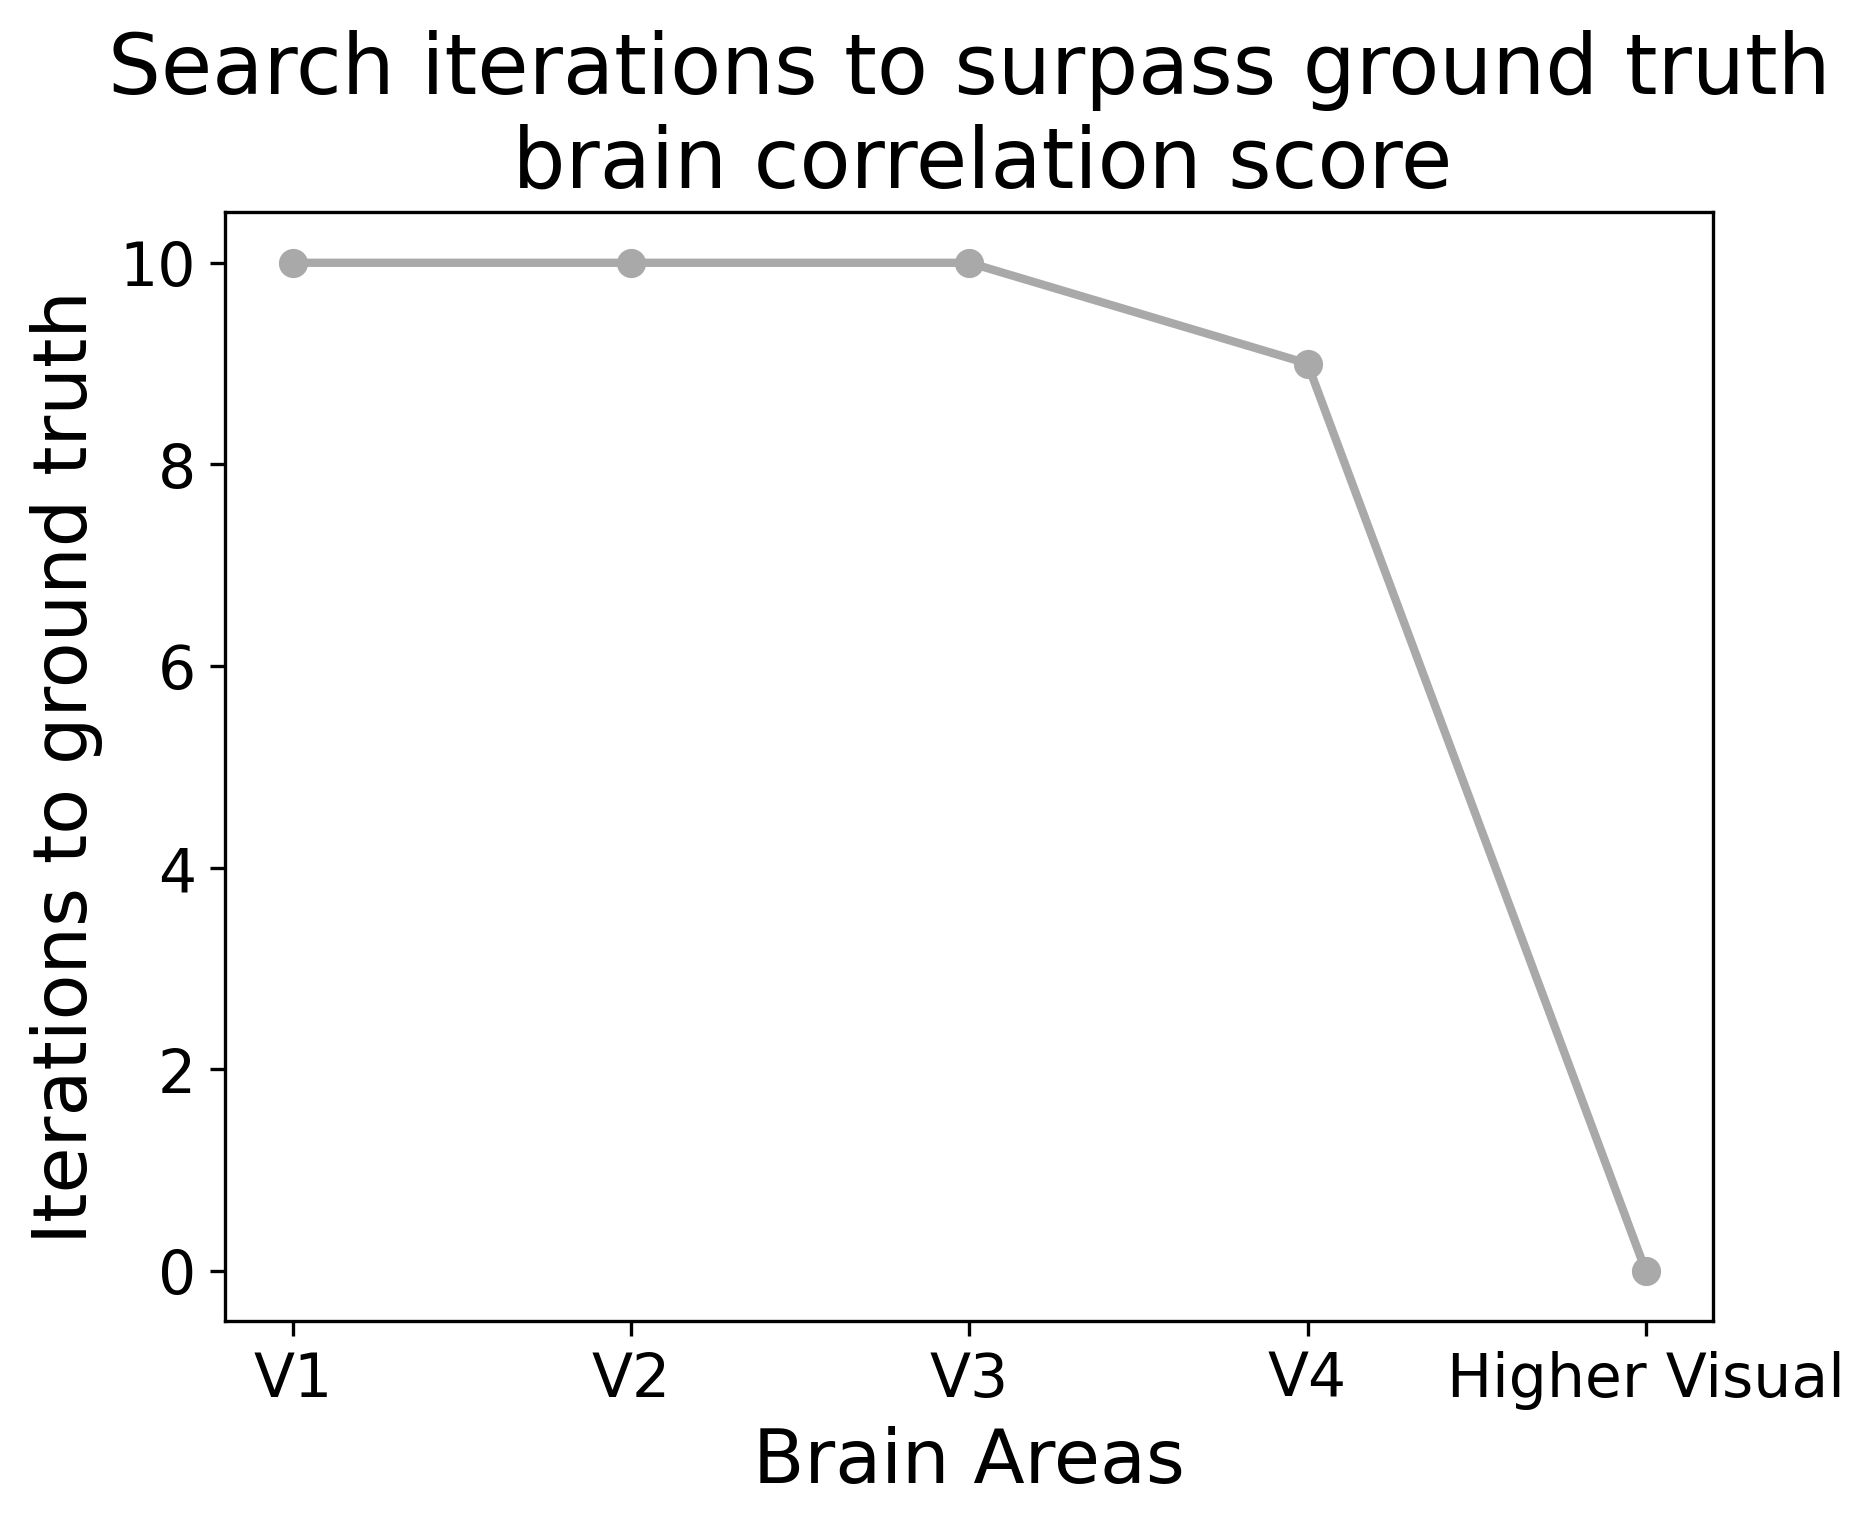

In [42]:
# Search iterations to Ground Truth

x_iter_values = []

x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(10)
x_iter_values.append(9)
x_iter_values.append(0)

x_labels = ['V1', 'V2', 'V3', 'V4', 'Higher Visual']
x_axis = np.arange(len(x_labels))
# y_labels = ["0", "2", "4", "6", "8", "10 >="]
# y_axis = np.arange(len(y_labels))

# x_iter_values.append(0)
# x_iter_values.append(x_v4)
# x_iter_values.append(x_v3)
# x_iter_values.append(x_v2)
# x_iter_values.append(9)

# x_labels = ['Higher Visual', 'V4', 'V3', 'V2', 'V1']
plt.xticks(x_axis, x_labels)
# plt.yticks(y_axis, y_labels)
plt.plot(x_iter_values, marker='o', linewidth=2, color = "darkgray")
plt.xlabel("Brain Areas", fontsize=18)
plt.ylabel("Iterations to ground truth", fontsize=18)
plt.title("Search iterations to surpass ground truth\n brain correlation score", fontsize=20)
mpl.rcParams['figure.dpi'] = 300

In [10]:
# Bar Plot Sample Counts 

idx = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 
        64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 106, 107, 108, 
        109, 110, 111, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 
        182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 
        221, 222, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 256, 257, 
        258, 259, 261, 262, 263, 264, 265, 266, 267, 268, 270, 272, 273, 274, 275, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 
        297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 
        333, 334, 335, 336, 337, 338, 339, 341, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 364, 365, 366, 367, 368, 369, 370, 
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 393, 394, 395, 396, 397, 398, 400, 401, 402, 403, 404, 406, 407, 408, 
        409, 410, 411, 412, 413, 414, 415, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 
        447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 481, 482, 
        483, 484, 485, 486, 487, 488, 489, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 
        521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 547, 548, 549, 551, 552, 553, 554, 555, 556, 557, 
        558, 559, 560, 561, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 
        594, 595, 596, 597, 600, 601, 602, 603, 604, 605, 606, 607, 608, 609, 610, 611, 612, 613, 614, 616, 617, 618, 619, 620, 621, 622, 624, 625, 626, 627, 628, 629, 630, 631, 632, 
        633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 655, 656, 657, 659, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 
        672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 690, 691, 692, 694, 695, 696, 698, 699, 700, 701, 702, 703, 704, 705, 706, 708, 709, 
        710, 711, 712, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 
        747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 782, 783, 
        784, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819,
        820, 821, 822, 823, 824, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 838, 839, 840, 841, 842, 843, 844, 845, 847, 848, 849, 851, 852, 854, 855, 856, 857, 858, 859,
        861, 862, 863, 864, 865, 866, 867, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 892, 893, 894, 895, 896, 897, 
        898, 899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 
        934, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 
        971, 974, 976, 977, 978, 979, 980, 981]

v1 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v2 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v3 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
v4 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
ev = [0, 0, 0, 0, 0, 0, 0, 0, 0]
hv = [0, 0, 0, 0, 0, 0, 0, 0, 0]
nsd = [0, 0, 0, 0, 0, 0, 0, 0, 0]

#folders = {"vdvae_distribution" : 0, "clip_distribution" : 1, "clip+vdvae_distribution" : 2, "iter_0" : 3, "iter_1" : 4, "iter_2" : 5, "iter_3" : 6, "iter_4" : 7 , "iter_5": 8}
#folders = {"clip_distribution" : 1, "vdvae_distribution" : 2, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
folders = {"vdvae_distribution" : 2, "clip_distribution" : 1, "clip+vdvae_distribution" : 3, "iter_0" : 4, "iter_1" : 5 , "iter_2" : 6, "iter_3" : 7, "iter_4" : 8, "iter_5" : 9}
list_indicator = {2 : 0, 1 : 1, 3 : 2, 4 : 3, 5 : 4 , 6 : 5, 7 : 6, 8 : 7, 9 : 8}

ground_truth_samples = df.loc[(df['Sample Indicator'] == 0)]

# Append rows to an empty DataFrame
for i in tqdm(idx, desc="creating bar graph numbers"):
        
    ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
    ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
    ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
    ground_truth_v4     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V4'])
    ground_truth_ev     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Early Visual'])
    ground_truth_hv     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation Higher Visual'])
    ground_truth_nsd    = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation NSD General'])
    
    single_sample = df.loc[(df['ID'] == i)]
    single_sample = single_sample[:-2]
    
    for folder, value in folders.items():
    
        v1_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V1'].mean()
        v2_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V2'].mean()
        v3_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V3'].mean()
        v4_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation V4'].mean()
        ev_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Early Visual'].mean()
        hv_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation Higher Visual'].mean()
        nsd_bc = single_sample.loc[(single_sample['Sample Indicator'] == value)]['Brain Correlation NSD General'].mean()

        if(v1_bc > ground_truth_v1):
            v1[list_indicator[value]] += 1
            
        if(v2_bc > ground_truth_v2):
            v2[list_indicator[value]] += 1
            
        if(v3_bc > ground_truth_v3):
            v3[list_indicator[value]] += 1
            
        if(v4_bc > ground_truth_v4):
            v4[list_indicator[value]] += 1
        
        if(ev_bc > ground_truth_ev):
            ev[list_indicator[value]] += 1
            
        if(hv_bc > ground_truth_hv):
            hv[list_indicator[value]] += 1
            
        if(nsd_bc > ground_truth_nsd):
            nsd[list_indicator[value]] += 1
            
print(v1)
print(v2)
print(v3)
print(v4)
print(ev)
print(hv)
print(nsd)
    



creating bar graph numbers:   0%|          | 0/897 [00:00<?, ?it/s]/tmp/ipykernel_8059/1933675742.py:46: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v1     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V1'])
/tmp/ipykernel_8059/1933675742.py:47: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v2     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V2'])
/tmp/ipykernel_8059/1933675742.py:48: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ground_truth_v3     = float(ground_truth_samples.loc[(ground_truth_samples['ID'] == i)]['Brain Correlation V3'])
/tmp/ipykernel_8059/1933675742.py:49: FutureW

creating bar graph numbers: 100%|██████████| 897/897 [00:16<00:00, 55.54it/s]

[45, 5, 8, 11, 8, 7, 10, 10, 10]
[93, 12, 32, 33, 28, 31, 39, 37, 50]
[126, 27, 66, 74, 73, 77, 91, 109, 130]
[151, 81, 130, 143, 169, 173, 200, 221, 247]
[58, 5, 16, 17, 19, 15, 23, 26, 30]
[80, 192, 230, 244, 271, 289, 299, 308, 333]
[56, 39, 78, 96, 89, 96, 114, 124, 139]


In [15]:
# Create Bar Plots

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker



# x = ["vdvae", "clip", "clip+\nvdvae", "iter 0", "iter 1", "iter 2", "iter 3", "iter 4", "iter 5"]
# x = ["V1", "V2", "V3", "V4", "Early \nVisual", "Higher \nVisual", "NSD \nGeneral"]

# vdvae       = [v1[0], v2[0], v3[0], v4[0], ev[0], hv[0], nsd[0]]
# clip        = [v1[1], v2[1], v3[1], v4[1], ev[1], hv[1], nsd[1]]
# clip_vdvae  = [v1[2], v2[2], v3[2], v4[2], ev[2], hv[2], nsd[2]]
# iter_0      = [v1[3], v2[3], v3[3], v4[3], ev[3], hv[3], nsd[3]]
# iter_1      = [v1[4], v2[4], v3[4], v4[4], ev[4], hv[4], nsd[4]]
# iter_2      = [v1[5], v2[5], v3[5], v4[5], ev[5], hv[5], nsd[5]]
# iter_3      = [v1[6], v2[6], v3[6], v4[6], ev[6], hv[6], nsd[6]]
# iter_4      = [v1[7], v2[7], v3[7], v4[7], ev[7], hv[7], nsd[7]]
# iter_5      = [v1[8], v2[8], v3[8], v4[8], ev[8], hv[8], nsd[8]]


x = ["V1", "V2", "V3", "V4", "Higher \nVisual", "NSD \nGeneral"]

vdvae       = [v1[0], v2[0], v3[0], v4[0], hv[0], nsd[0]]
clip        = [v1[1], v2[1], v3[1], v4[1], hv[1], nsd[1]]
clip_vdvae  = [v1[2], v2[2], v3[2], v4[2], hv[2], nsd[2]]
iter_0      = [v1[3], v2[3], v3[3], v4[3], hv[3], nsd[3]]
iter_1      = [v1[4], v2[4], v3[4], v4[4], hv[4], nsd[4]]
iter_2      = [v1[5], v2[5], v3[5], v4[5], hv[5], nsd[5]]
iter_3      = [v1[6], v2[6], v3[6], v4[6], hv[6], nsd[6]]
iter_4      = [v1[7], v2[7], v3[7], v4[7], hv[7], nsd[7]]
iter_5      = [v1[8], v2[8], v3[8], v4[8], hv[8], nsd[8]]


x_axis = np.arange(len(x))

n = 6
r = np.arange(n)
width = 0.10


plt.bar(r - width * 4, vdvae, color = '#e3342f',
        width = width, edgecolor = 'black',
        label='VDVAE')
plt.bar(r - width * 3, clip, color = '#f6993f',
        width = width, edgecolor = 'black',
        label='CLIP')
plt.bar(r - width * 2, clip_vdvae, color = '#ffed4a',
        width = width, edgecolor = 'black',
        label='CLIP+VDVAE')
plt.bar(r - width, iter_0, color = '#38c172',
        width = width, edgecolor = 'black',
        label='iter 0')
plt.bar(r, iter_1, color = '#4dc0b5',
        width = width, edgecolor = 'black',
        label='iter 1')
plt.bar(r + width, iter_2, color = '#3490dc',
        width = width, edgecolor = 'black',
        label='iter 2')
plt.bar(r + width * 2, iter_3, color = '#6574cd',
        width = width, edgecolor = 'black',
        label='iter 3')
plt.bar(r + width * 3, iter_4, color = '#9561e2',
        width = width, edgecolor = 'black',
        label='iter 4')
plt.bar(r + width * 4, iter_5, color = '#f66d9b',
        width = width, edgecolor = 'black',
        label='iter 5')

plt.xticks(x_axis, x)
plt.xlabel("Brain Areas")
plt.ylabel("Percentage of samples aligned to brain activity")
plt.title("Sample Distributions Alighned to Brain Activity (N = 897)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(897))
#plt.xlim(897)
plt.legend(fontsize = "x-small")
mpl.rcParams['figure.dpi'] = 500
plt.show()





In [47]:
df_final_samples_bc = df.loc[(df['Search Reconstruction'] == True)]
df_final_samples_bc = df_final_samples_bc.groupby('ID').mean()
bc_data = df_final_samples_bc['Brain Correlation NSD General'].values.astype(float).tolist()

clip_data = []
for i in range(5):
    clip_data.append(np.load("/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight-Archive/reconstructions/subject1/dataframes/alexnet_7_sample_{}.npy".format(i)))
clip_data = np.stack(clip_data)
print(clip_data.shape)
clip_data = list(np.mean(clip_data, axis=0))



(5, 897)


/tmp/ipykernel_53300/221700657.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_final_samples_bc = df_final_samples_bc.groupby('ID').mean()


Text(0.5, 1.0, 'CNN to brain correlation plot')

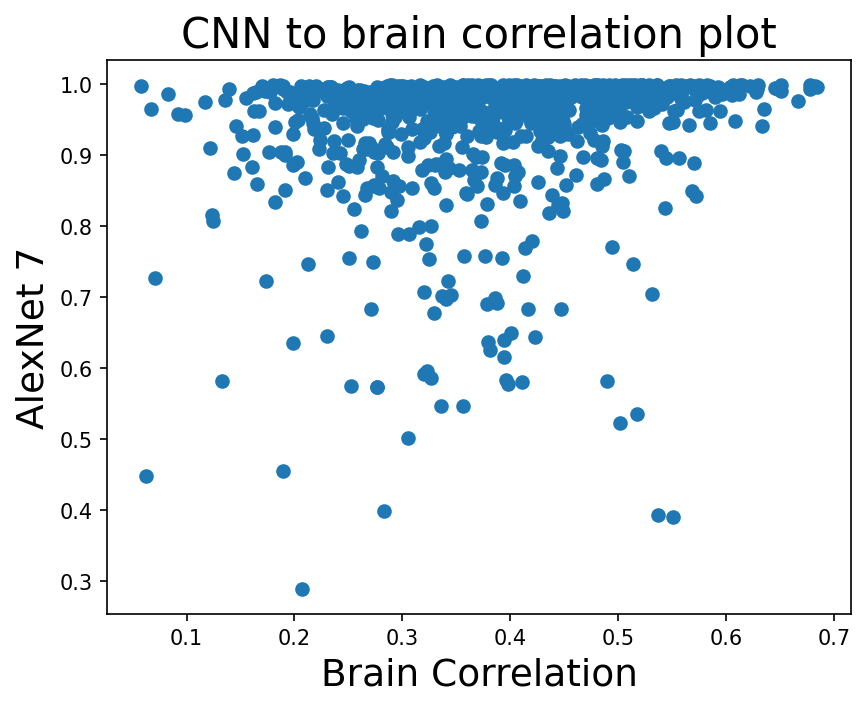

In [48]:
# CNN to brain correlation plot


plt.scatter(bc_data, clip_data)
plt.xlabel("Brain Correlation", fontsize=18)
plt.ylabel("AlexNet 7", fontsize=18)
plt.title("CNN to brain correlation plot", fontsize=20)
# mpl.rcParams['figure.dpi'] = 150